<a href="https://colab.research.google.com/github/mikemwai/signsense/blob/master/signsense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
!pip install pillow
!pip install gdown
!pip install ultralytics
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 36.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import gdown
import zipfile
import random
from sklearn.model_selection import train_test_split
from PIL import Image, ExifTags
from google.colab import drive
from IPython.display import Image, display, Video
from ultralytics import YOLO
from glob import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Import Dataset

## Downloading the image dataset

### In Google Drive it's `kaggle_dataset.zip`. NOT SPLITTED, PREPROCESSED

In [ ]:
file_id = "1ACKuyIK269rDEQMF95IOo1gYUuScLGeQ"

url = f"https://drive.google.com/uc?id={file_id}"

output = "kaggle_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1ACKuyIK269rDEQMF95IOo1gYUuScLGeQ
From (redirected): https://drive.google.com/uc?id=1ACKuyIK269rDEQMF95IOo1gYUuScLGeQ&confirm=t&uuid=cf254cc8-2a58-44d9-97f1-9d1567f35f25
To: /content/kaggle_dataset.zip
100%|██████████| 1.18G/1.18G [00:24<00:00, 48.6MB/s]


Folder extracted.


### In Google Drive it's `kaggle_dataset_classes.zip`. NOT PREPROCESSED

In [ ]:
file_id = "1taCOEIA5LDUBk4D1yF9Qc-SMFu1w2Pri"

url = f"https://drive.google.com/uc?id={file_id}"

output = "kaggle_dataset_classes.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1taCOEIA5LDUBk4D1yF9Qc-SMFu1w2Pri
From (redirected): https://drive.google.com/uc?id=1taCOEIA5LDUBk4D1yF9Qc-SMFu1w2Pri&confirm=t&uuid=e63c61fb-7ffd-466c-a877-48a5dc319510
To: /content/kaggle_dataset_classes.zip
100%|██████████| 827M/827M [00:13<00:00, 59.6MB/s]


Folder extracted.


### In Google Drive it's `new_kaggle_dataset.zip`. PREPROCESSED

In [ ]:
file_id = "1wcVmqMZ_D_v78R7ocJqhlO9XFVKxxBD6"

url = f"https://drive.google.com/uc?id={file_id}"

output = "new_kaggle_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1wcVmqMZ_D_v78R7ocJqhlO9XFVKxxBD6
From (redirected): https://drive.google.com/uc?id=1wcVmqMZ_D_v78R7ocJqhlO9XFVKxxBD6&confirm=t&uuid=a7324111-90b3-49b6-b8dd-642a5b5008a4
To: /content/new_kaggle_dataset.zip
100%|██████████| 284M/284M [00:07<00:00, 39.3MB/s]


Folder extracted.


### In Google Drive it's `roboflow_dataset.zip`

In [ ]:
file_id = "1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5"

url = f"https://drive.google.com/uc?id={file_id}"

output = "roboflow_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

### Download image dataset from `Roboflow`

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="L2onpH4rsm4SdhVYcRe9")
project = rf.workspace("dataset-h8ooc").project("dataset-ay1vb")
version = project.version(7)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset-7 in yolov8:: 100%|██████████| 7776/7776 [00:01<00:00, 4702.32it/s]


## Downloading the video dataset


### In Google Drive it's `video_dataset.zip`. NOT SPLITTED, PREPROCESSED

In [ ]:
file_id = "1RDpG_onbXJi5W1hh35hAN3flCJPqWZzX"

url = f"https://drive.google.com/uc?id={file_id}"

output = "video_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1RDpG_onbXJi5W1hh35hAN3flCJPqWZzX
From (redirected): https://drive.google.com/uc?id=1RDpG_onbXJi5W1hh35hAN3flCJPqWZzX&confirm=t&uuid=3c66cf11-3b94-4556-a6a5-b64dbbb5c9aa
To: /content/video_dataset.zip
100%|██████████| 109M/109M [00:04<00:00, 26.6MB/s]


Folder extracted.


### In Google Drive it's `video_dataset - letters.zip`

In [7]:
file_id = "1xYTStx8jxyPa-2wp_nZWq16uaFA03ngn"

url = f"https://drive.google.com/uc?id={file_id}"

output = "video_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1xYTStx8jxyPa-2wp_nZWq16uaFA03ngn
From (redirected): https://drive.google.com/uc?id=1xYTStx8jxyPa-2wp_nZWq16uaFA03ngn&confirm=t&uuid=7ef28c75-804b-4ab0-81e1-bab9e8c8c301
To: /content/video_dataset.zip
100%|██████████| 166M/166M [00:01<00:00, 110MB/s]


Folder extracted.


## Download the `Letters` dataset

In [ ]:
file_id = "1ZoBDPr2bn0m4VsLX82nd9PNkbewxyZPO"

url = f"https://drive.google.com/uc?id={file_id}"

output = "Letters.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1ZoBDPr2bn0m4VsLX82nd9PNkbewxyZPO
From (redirected): https://drive.google.com/uc?id=1ZoBDPr2bn0m4VsLX82nd9PNkbewxyZPO&confirm=t&uuid=d5366cf0-0e94-4ad3-b1a2-6a63c01c0c7b
To: /content/Letters.zip
100%|██████████| 57.1M/57.1M [00:02<00:00, 27.7MB/s]


Folder extracted.


# Downloading the Combined dataset

## Download the dataset from `Roboflow`

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="L2onpH4rsm4SdhVYcRe9")
project = rf.workspace("dataset-h8ooc").project("dataset-ay1vb")
version = project.version(5)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset-5 in yolov8:: 100%|██████████| 5210/5210 [00:00<00:00, 5363.43it/s]


## Checking for any errors in the dataset

In [ ]:
!unzip -t video_dataset.zip

Archive:  video_dataset.zip
    testing: video_dataset/           OK
    testing: video_dataset/test/      OK
    testing: video_dataset/test/Hello/   OK
    testing: video_dataset/test/Hello/Hello_front.MOV   OK
    testing: video_dataset/test/Hello/Hello_left.MOV   OK
    testing: video_dataset/test/Hello/Hello_right.MOV   OK
    testing: video_dataset/test/Help/   OK
    testing: video_dataset/test/Help/Help_front.MOV   OK
    testing: video_dataset/test/Help/Help_left.MOV   OK
    testing: video_dataset/test/Help/Help_right.MOV   OK
    testing: video_dataset/test/Iammarried/   OK
    testing: video_dataset/test/Iammarried/Iammarried_front.MOV   OK
    testing: video_dataset/test/Iammarried/Iammarried_left.MOV   OK
    testing: video_dataset/test/Iammarried/Iammarried_right.MOV   OK
    testing: video_dataset/test/Iloveyou/   OK
    testing: video_dataset/test/Iloveyou/Iloveyou_front.MOV   OK
    testing: video_dataset/test/Iloveyou/Iloveyou_left.MOV   OK
    testing: video_dataset

## Extracting the zip folder

In [ ]:
z = zipfile.ZipFile('dataset.zip')
z.extractall()
print("Extraction complete!")

Extraction complete!


# Dataset Splitting

## Converting the kaggle dataset based on the classes

In [ ]:
csv_file = "C:\Datasets\Kaggle Dataset - Yonas\Kaggle Dataset\Kaggle Dataset - Yonas\Train.csv"
df = pd.read_csv(csv_file)

image_folder = "C:\Datasets\Kaggle Dataset - Yonas\Kaggle Dataset\Kaggle Dataset - Yonas\Images\Images"
output_folder = "new_dataset"

labels = df['Label'].unique()
for label in labels:
    label_path = os.path.join(output_folder, label)
    os.makedirs(label_path, exist_ok=True)

for index, row in df.iterrows():
    image_id = row['img_IDS']
    label = row['Label']

    src_image_path = os.path.join(image_folder, image_id + ".jpg")

    dest_folder = os.path.join(output_folder, label)
    dest_image_path = os.path.join(dest_folder, image_id + ".jpg")

    if os.path.exists(src_image_path):
        shutil.move(src_image_path, dest_image_path)
    else:
        print(f"Image {image_id}.jpg not found.")

print("Images have been organized based on their labels.")

### Splitting the dataset based on the classes

In [ ]:
class_names = ['church', 'enough', 'friend', 'love', 'me', 'mosque', 'seat', 'temple', 'you']

image_directories = ['./dataset/train/images', './dataset/valid/images', './dataset/test/images']
label_directories = ['./dataset/train/labels', './dataset/valid/labels', './dataset/test/labels']

output_directory = './sorted_by_class'

for class_name in class_names:
    class_folder = os.path.join(output_directory, class_name)
    os.makedirs(class_folder, exist_ok=True)

for img_dir, lbl_dir in zip(image_directories, label_directories):
    for label_file in os.listdir(lbl_dir):
        label_path = os.path.join(lbl_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_id = int(line.split()[0])

            img_file = label_file.replace('.txt', '.jpg')
            img_path = os.path.join(img_dir, img_file)

            if os.path.exists(img_path):
                dest_folder = os.path.join(output_directory, class_names[class_id])
                shutil.copy(img_path, dest_folder)

### Splitting into train, test and valid folders

In [ ]:
dataset_dir = 'dataset'
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

splits = ['train', 'valid', 'test']
output_dir = 'dataset_split'
os.makedirs(output_dir, exist_ok=True)

for split in splits:
    for category in os.listdir(dataset_dir):
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]

    if len(images) < 2:

        train_images = images
        val_images = []
        test_images = []
    else:

        train_images, test_images = train_test_split(images, test_size=(test_ratio + val_ratio))
        val_images, test_images = train_test_split(test_images, test_size=test_ratio / (test_ratio + val_ratio))

    def copy_images(image_list, split):
        for image in image_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(output_dir, split, category, image)
            shutil.copyfile(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'valid')
    copy_images(test_images, 'test')

print("Dataset split into train, valid, and test sets successfully!")

Dataset split into train, valid, and test sets successfully!


In [ ]:
dataset_dir = 'dataset_split'

splits = ['train', 'valid', 'test']

for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    if os.path.exists(split_dir):
        for category in os.listdir(split_dir):
            category_path = os.path.join(split_dir, category)
            if os.path.isdir(category_path):
                images = os.listdir(category_path)
                print(f"Found {len(images)} images for class {category} in {split} set")
            else:
                print(f"No images found for class {category} in {split} set")
    else:
        print(f"Directory {split_dir} does not exist.")

Found 486 images for class Enough in train set
Found 485 images for class Temple in train set
Found 486 images for class Mosque in train set
Found 485 images for class Love in train set
Found 486 images for class Seat in train set
Found 485 images for class Friend in train set
Found 485 images for class Church in train set
Found 485 images for class Me in train set
Found 485 images for class You in train set
Found 69 images for class Enough in valid set
Found 69 images for class Temple in valid set
Found 69 images for class Mosque in valid set
Found 69 images for class Love in valid set
Found 69 images for class Seat in valid set
Found 69 images for class Friend in valid set
Found 69 images for class Church in valid set
Found 69 images for class Me in valid set
Found 69 images for class You in valid set
Found 140 images for class Enough in test set
Found 140 images for class Temple in test set
Found 140 images for class Mosque in test set
Found 140 images for class Love in test set
Fou

## Converting the kaggle dataset to a YOLO format

In [ ]:
original_dataset_path = 'preprocessed_dataset'
output_path = 'new_kaggle_dataset'

classes = ['Church', 'Enough (Satisfied)', 'Friend', 'Love', 'Me', 'Mosque', 'Seat', 'Temple', 'You']

os.makedirs(os.path.join(output_path, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'valid/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'valid/labels'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'test/labels'), exist_ok=True)

split_folders = ['train', 'valid', 'test']

def process_images(class_name, img_files, phase):
    if not img_files:
        print(f"No images found for class {class_name} in {phase} phase!")
        return

    print(f"Processing {len(img_files)} images for {phase} phase in class {class_name}.")
    for img_file in img_files:
        img_name = os.path.basename(img_file)
        shutil.copy(img_file, os.path.join(output_path, f'{phase}/images', img_name))

        label_file = os.path.join(output_path, f'{phase}/labels', img_name.replace('.jpg', '.txt'))

        with open(label_file, 'w') as f:
            f.write("")

for class_name in classes:
    for phase in split_folders:
        class_path = os.path.join(original_dataset_path, phase, class_name)
        img_files = glob(os.path.join(class_path, '*.*'))

        print(f"Found {len(img_files)} images for class {class_name} in {phase} phase.")
        process_images(class_name, img_files, phase)

yaml_content = f"""
train: {output_path}/train/images
val: {output_path}/valid/images
test: {output_path}/test/images

nc: {len(classes)}  # Number of classes
names: {classes}  # Class names
"""

yaml_path = os.path.join(output_path, 'dataset.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print("Dataset successfully converted to YOLO format!")

Found 485 images for class Church in train phase.
Processing 485 images for train phase in class Church.
Found 69 images for class Church in valid phase.
Processing 69 images for valid phase in class Church.
Found 140 images for class Church in test phase.
Processing 140 images for test phase in class Church.
Found 0 images for class Enough (Satisfied) in train phase.
No images found for class Enough (Satisfied) in train phase!
Found 0 images for class Enough (Satisfied) in valid phase.
No images found for class Enough (Satisfied) in valid phase!
Found 0 images for class Enough (Satisfied) in test phase.
No images found for class Enough (Satisfied) in test phase!
Found 485 images for class Friend in train phase.
Processing 485 images for train phase in class Friend.
Found 69 images for class Friend in valid phase.
Processing 69 images for valid phase in class Friend.
Found 140 images for class Friend in test phase.
Processing 140 images for test phase in class Friend.
Found 485 images 

## Compressing the new dataset folder to a zip file

In [ ]:
folder_to_zip = 'videos_Letters'

output_zip_file = 'dataset2.zip'

shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' has been successfully compressed into '{output_zip_file}'")

Folder 'videos_Letters' has been successfully compressed into 'dataset2.zip'


# Deleting any folder

In [ ]:
shutil.rmtree('dataset-6')

# Exploratory Data Analysis

### Image Dataset

In [ ]:
total_images = 0

for root, dirs, files in os.walk("augmented_Letters"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', 'JPG')):
            total_images += 1

print(f'{total_images} images')

0 images


In [ ]:
test_images = 0
train_images = 0
valid_images = 0

for root, dirs, files in os.walk("dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            if 'test' in root:
                test_images += 1
            elif 'train' in root:
                train_images += 1
            elif 'valid' in root:
                valid_images += 1

print(f'test: {test_images} images')
print(f'train: {train_images} images')
print(f'valid: {valid_images} images')

test: 251 images
train: 3197 images
valid: 487 images


In [ ]:
data = {'Images in Train': train_images, 'Images in Test': test_images, 'Images in Valid': valid_images}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Images")
plt.ylabel("No of Images")
plt.title("Count of Sign Gesture Images")
plt.show()

### Video Dataset

In [ ]:
total_videos = 0

for root, dirs, files in os.walk("Letters"):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            total_videos += 1

print(f'{total_videos} videos')

2 videos


In [ ]:
test_videos = 0
train_videos = 0
valid_videos = 0

for root, dirs, files in os.walk("video_dataset"):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            if 'test' in root:
                test_videos += 1
            elif 'train' in root:
                train_videos += 1
            elif 'valid' in root:
                valid_videos += 1

print(f'test: {test_videos} videos')
print(f'train: {train_videos} videos')
print(f'valid: {valid_videos} videos')

test: 20 videos
train: 20 videos
valid: 20 videos


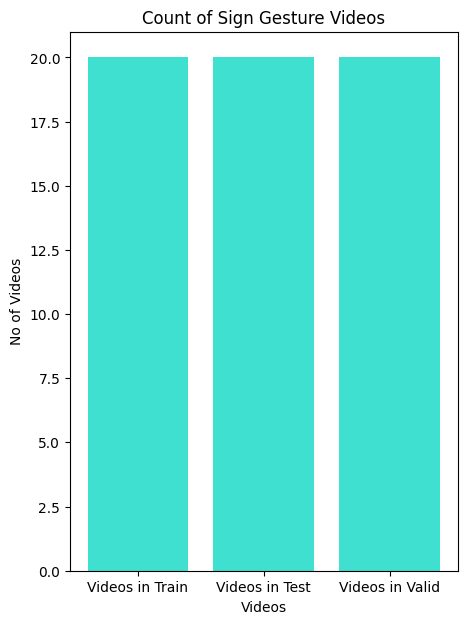

In [ ]:
data = {'Videos in Train': train_videos, 'Videos in Test': test_videos, 'Videos in Valid': valid_videos}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Videos")
plt.ylabel("No of Videos")
plt.title("Count of Sign Gesture Videos")
plt.show()

# Data Preprocessing

In [ ]:
import os
import shutil
from PIL import Image, ExifTags

input_dir = '/content/video_dataset/train/Letters'
output_dir = 'preprocessed_Letters'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)
            img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff', 'JPG')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

Skipping non-image file: /content/video_dataset/train/Letters/Z.MOV
Skipping non-image file: /content/video_dataset/train/Letters/J.MOV
Preprocessing complete.


In [ ]:
import os
from PIL import Image, ExifTags

input_dir = 'new_dataset'
output_dir = 'preprocessed_dataset'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)
            img.save(output_path)
            print(f"Successfully processed and saved: {output_path}")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

# Data Augmentation

## Image Dataset

In [18]:
import os
from PIL import Image, ImageEnhance
import random
import numpy as np

# Parameters
input_dir = '/content/video_dataset/train/Letters'
output_dir = 'augmented_Letters'
desired_image_count = 300  # Target number of images per letter (adjust as needed)

os.makedirs(output_dir, exist_ok=True)

def augment_image(image_path, output_path):
    try:
        with Image.open(image_path) as img:
            # Flip image horizontally
            flipped_img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
            flipped_img.save(output_path.replace('.jpg', '_flip.jpg'))  # Save flipped version

            # Rotate image by random angle between -30 and 30 degrees
            rotated_img = img.rotate(random.uniform(-30, 30))
            rotated_img.save(output_path.replace('.jpg', '_rotated.jpg'))  # Save rotated version

            # Random scaling (zoom in/out)
            scale_factor = random.uniform(0.8, 1.2)
            scaled_img = img.resize((int(img.width * scale_factor), int(img.height * scale_factor)))
            scaled_img.save(output_path.replace('.jpg', '_scaled.jpg'))  # Save scaled version

            # Random brightness adjustment
            enhancer = ImageEnhance.Brightness(img)
            brightness_factor = random.uniform(0.5, 1.5)  # Random brightness factor
            bright_img = enhancer.enhance(brightness_factor)
            bright_img.save(output_path.replace('.jpg', '_brightened.jpg'))  # Save brightness adjusted version

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def augment_images_for_letter(letter_dir, letter_name):
    """
    Perform augmentation on the images of each letter to reach the desired image count.
    """
    files = [f for f in os.listdir(letter_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
    image_count = len(files)

    # Ensure we have enough images
    if image_count >= desired_image_count:
        print(f"Letter {letter_name} already has enough images: {image_count}")
        return

    # Augment images until we reach the desired count
    augmented_count = 0
    while image_count + augmented_count < desired_image_count:
        for file in files:
            image_path = os.path.join(letter_dir, file)

            # Prepare output folder for augmented images (subfolder for each letter)
            letter_output_dir = os.path.join(output_dir, letter_name)
            os.makedirs(letter_output_dir, exist_ok=True)

            # Generate augmented images
            augment_image(image_path, os.path.join(letter_output_dir, file))

            augmented_count += 1
            if image_count + augmented_count >= desired_image_count:
                break

    print(f"Augmented {augmented_count} images for letter {letter_name}.")

# Loop through all subfolders in the input directory (representing different letters)
for root, dirs, files in os.walk(input_dir):
    for dir in dirs:
        letter_dir = os.path.join(root, dir)
        augment_images_for_letter(letter_dir, dir)

print("Data augmentation complete.")

Data augmentation complete.


## Video Dataset

In [ ]:
import os
import cv2

# Define input and output directories
input_dir = 'Letters'  # Change this if your input folder name is different
output_dir = 'videos_Letters'
os.makedirs(output_dir, exist_ok=True)

# Supported video file extensions
VIDEO_EXTENSIONS = ('.mp4', '.avi', '.mkv', '.mov', '.wmv')

def augment_video(video_path, output_path):
    try:
        print(f"Processing video: {video_path}")
        cap = cv2.VideoCapture(video_path)

        # Get video properties
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        # Define codec and create VideoWriter with the output path
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Flip the frame horizontally as a simple augmentation
            flipped_frame = cv2.flip(frame, 1)

            # Debugging step: check if flipping is applied
            if frame_count < 5:  # Only print for the first few frames to avoid clutter
                print(f"Original frame shape: {frame.shape}")
                print(f"Flipped frame shape: {flipped_frame.shape}")

            # Write the flipped frame to the output video
            out.write(flipped_frame)
            frame_count += 1

        cap.release()
        out.release()
        print(f"Successfully processed {frame_count} frames for: {output_path}")

    except Exception as e:
        print(f"Error processing {video_path}: {e}")

# Process each video in the input directory and its subdirectories
for root, _, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(VIDEO_EXTENSIONS):
            input_path = os.path.join(root, file)

            # Create corresponding subfolder structure in the output directory
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            # Define output path with a "flipped_" prefix
            output_path = os.path.join(output_subfolder, f"flipped_{file}")

            # Run the augmentation on the video
            augment_video(input_path, output_path)

print("Video processing complete.")

Processing video: Letters/Z.MOV
Original frame shape: (1192, 1062, 3)
Flipped frame shape: (1192, 1062, 3)
Original frame shape: (1192, 1062, 3)
Flipped frame shape: (1192, 1062, 3)
Original frame shape: (1192, 1062, 3)
Flipped frame shape: (1192, 1062, 3)
Original frame shape: (1192, 1062, 3)
Flipped frame shape: (1192, 1062, 3)
Original frame shape: (1192, 1062, 3)
Flipped frame shape: (1192, 1062, 3)
Successfully processed 69 frames for: videos_Letters/./flipped_Z.MOV
Processing video: Letters/J.MOV
Original frame shape: (2228, 2158, 3)
Flipped frame shape: (2228, 2158, 3)
Original frame shape: (2228, 2158, 3)
Flipped frame shape: (2228, 2158, 3)
Original frame shape: (2228, 2158, 3)
Flipped frame shape: (2228, 2158, 3)
Original frame shape: (2228, 2158, 3)
Flipped frame shape: (2228, 2158, 3)
Original frame shape: (2228, 2158, 3)
Flipped frame shape: (2228, 2158, 3)
Successfully processed 35 frames for: videos_Letters/./flipped_J.MOV
Video processing complete.


## Merging Dataset

In [ ]:
dataset1_path = 'old_dataset'
dataset2_path = 'yolo_format_dataset'

combined_output_path = 'combined_yolo_dataset'

for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(combined_output_path, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(combined_output_path, split, 'labels'), exist_ok=True)

def merge_datasets(split):
    for dataset_path in [dataset1_path, dataset2_path]:
        image_files = glob(os.path.join(dataset_path, split, 'images', '*.*'))
        for img_file in image_files:
            img_name = os.path.basename(img_file)
            new_img_name = f"{os.path.basename(dataset_path)}_{img_name}"
            shutil.copy(img_file, os.path.join(combined_output_path, split, 'images', new_img_name))

        label_files = glob(os.path.join(dataset_path, split, 'labels', '*.txt'))
        for label_file in label_files:
            label_name = os.path.basename(label_file)
            new_label_name = f"{os.path.basename(dataset_path)}_{label_name}"
            shutil.copy(label_file, os.path.join(combined_output_path, split, 'labels', new_label_name))

for split in ['train', 'valid', 'test']:
    merge_datasets(split)

dataset1_yaml = os.path.join(dataset1_path, 'data.yaml')
dataset2_yaml = os.path.join(dataset2_path, 'dataset.yaml')

with open(dataset1_yaml, 'r') as f:
    yaml_content = f.read()

yaml_combined_path = os.path.join(combined_output_path, 'dataset.yaml')
with open(yaml_combined_path, 'w') as f:
    f.write(yaml_content)

print("Datasets successfully merged!")

Datasets successfully merged!


# A) CNN Model - YOLO

## Model Building

In [4]:
model = YOLO('yolo11n.pt')
# model = YOLO('best.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 164MB/s]


### Run inference/ prediction on a sample image

100%|██████████| 49.2k/49.2k [00:00<00:00, 11.0MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 125.5ms
Speed: 13.7ms preprocess, 125.5ms inference, 1120.6ms postprocess per image at shape (1, 3, 384, 640)


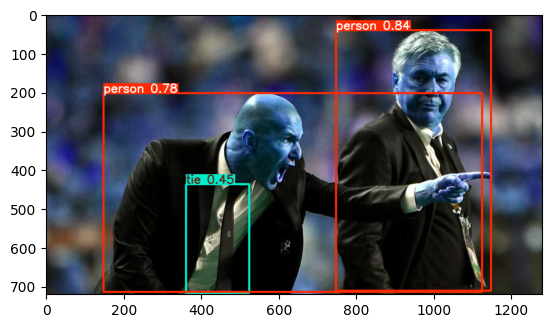

In [ ]:
results = model('https://ultralytics.com/images/zidane.jpg')
for result in results:
    plt.imshow(result.plot())
    plt.show()

### Access Predictions

In [ ]:
for result in results:
    print(result.boxes.xyxy)
    print(result.boxes.conf)
    print(result.boxes.cls)

tensor([[ 748.5070,   41.8127, 1148.0668,  711.1121],
        [ 148.5597,  203.0761, 1125.2758,  714.9879],
        [ 361.3872,  437.7334,  524.6575,  717.3186]], device='cuda:0')
tensor([0.8405, 0.7793, 0.4520], device='cuda:0')
tensor([ 0.,  0., 27.], device='cuda:0')


## Model Training - Train on a custom dataset

In [5]:
import os

paths_to_check = [
    'dataset/train/images',
    'dataset/valid/images',
    'dataset/test/images'
]

for path in paths_to_check:
    if os.path.exists(path):
        print(f"Path exists: {path}")
    else:
        print(f"Path does not exist: {path}")

Path exists: dataset/train/images
Path exists: dataset/valid/images
Path exists: dataset/test/images


In [6]:
model.train(data='/content/dataset/data.yaml', epochs=20, imgsz=640, batch=16)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 42.0MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 3145 images, 112 backgrounds, 0 corrupt: 100%|██████████| 3145/3145 [00:01<00:00, 1957.95it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/dataset/valid/labels... 486 images, 23 backgrounds, 0 corrupt: 100%|██████████| 486/486 [00:00<00:00, 1044.13it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.44G      1.135      3.439      1.535         21        640: 100%|██████████| 197/197 [01:13<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]

                   all        486        463      0.424      0.418      0.434      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.42G      1.083      2.271      1.433         23        640: 100%|██████████| 197/197 [01:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


                   all        486        463      0.633      0.523      0.564       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.41G      1.075      1.926      1.403         18        640: 100%|██████████| 197/197 [01:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.21it/s]


                   all        486        463      0.637      0.683      0.708       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.4G      1.051      1.715      1.383         24        640: 100%|██████████| 197/197 [01:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.17it/s]

                   all        486        463      0.767      0.726      0.776      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.4G      1.015      1.533      1.354         20        640: 100%|██████████| 197/197 [01:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]

                   all        486        463      0.746      0.735      0.807      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.39G     0.9891       1.36       1.33         21        640: 100%|██████████| 197/197 [01:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]

                   all        486        463      0.835      0.789      0.856      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.4G     0.9569      1.226      1.307         14        640: 100%|██████████| 197/197 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all        486        463      0.834       0.77      0.849      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.4G     0.9395       1.19      1.285         20        640: 100%|██████████| 197/197 [01:10<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.15it/s]

                   all        486        463      0.858       0.86      0.892       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.4G     0.9116      1.108      1.271         14        640: 100%|██████████| 197/197 [01:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all        486        463      0.861      0.859      0.879      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.38G     0.8949      1.039      1.258         19        640: 100%|██████████| 197/197 [01:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all        486        463      0.906      0.863      0.911      0.706


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.47G     0.7254      0.788      1.252          9        640: 100%|██████████| 197/197 [01:10<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.07it/s]

                   all        486        463      0.857      0.809      0.859      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.4G     0.6924     0.6938      1.218          9        640: 100%|██████████| 197/197 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]

                   all        486        463      0.883      0.889      0.906      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.4G     0.6683     0.6248      1.191          9        640: 100%|██████████| 197/197 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.66it/s]

                   all        486        463      0.881      0.888       0.92      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.39G     0.6322     0.5905      1.171          8        640: 100%|██████████| 197/197 [01:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.59it/s]

                   all        486        463      0.868      0.896      0.905      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.4G     0.5976     0.5379      1.135          9        640: 100%|██████████| 197/197 [01:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]

                   all        486        463       0.89      0.876      0.907      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.4G     0.5752     0.4965      1.113          9        640: 100%|██████████| 197/197 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]

                   all        486        463      0.896      0.891      0.911      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.4G     0.5425     0.4663      1.082          9        640: 100%|██████████| 197/197 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]

                   all        486        463      0.876      0.911      0.915      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.39G     0.5206     0.4368      1.078          9        640: 100%|██████████| 197/197 [01:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]

                   all        486        463      0.903      0.897      0.919      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.4G     0.4988     0.4131      1.058          9        640: 100%|██████████| 197/197 [01:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]


                   all        486        463      0.911      0.901      0.921      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G     0.4728     0.3984      1.037          9        640: 100%|██████████| 197/197 [01:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]

                   all        486        463      0.894      0.905      0.924      0.752



20 epochs completed in 0.399 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]


                   all        486        463      0.894      0.905      0.923      0.752
                church         46         46      0.873      0.898      0.934      0.747
                enough         38         38      0.918      0.882       0.96      0.804
                friend         44         44      0.888      0.903      0.887      0.679
                  love         49         49      0.906      0.978      0.953       0.73
                    me         62         62      0.887      0.935      0.929      0.717
                mosque         64         64      0.919      0.891      0.942      0.809
                  seat         51         51      0.918      0.882      0.913      0.782
                temple         59         59      0.905      0.898      0.919      0.776
                   you         50         50      0.829      0.875      0.872      0.719
Speed: 0.5ms preprocess, 2.8ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b28e069570>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

## Model Performance Visualization

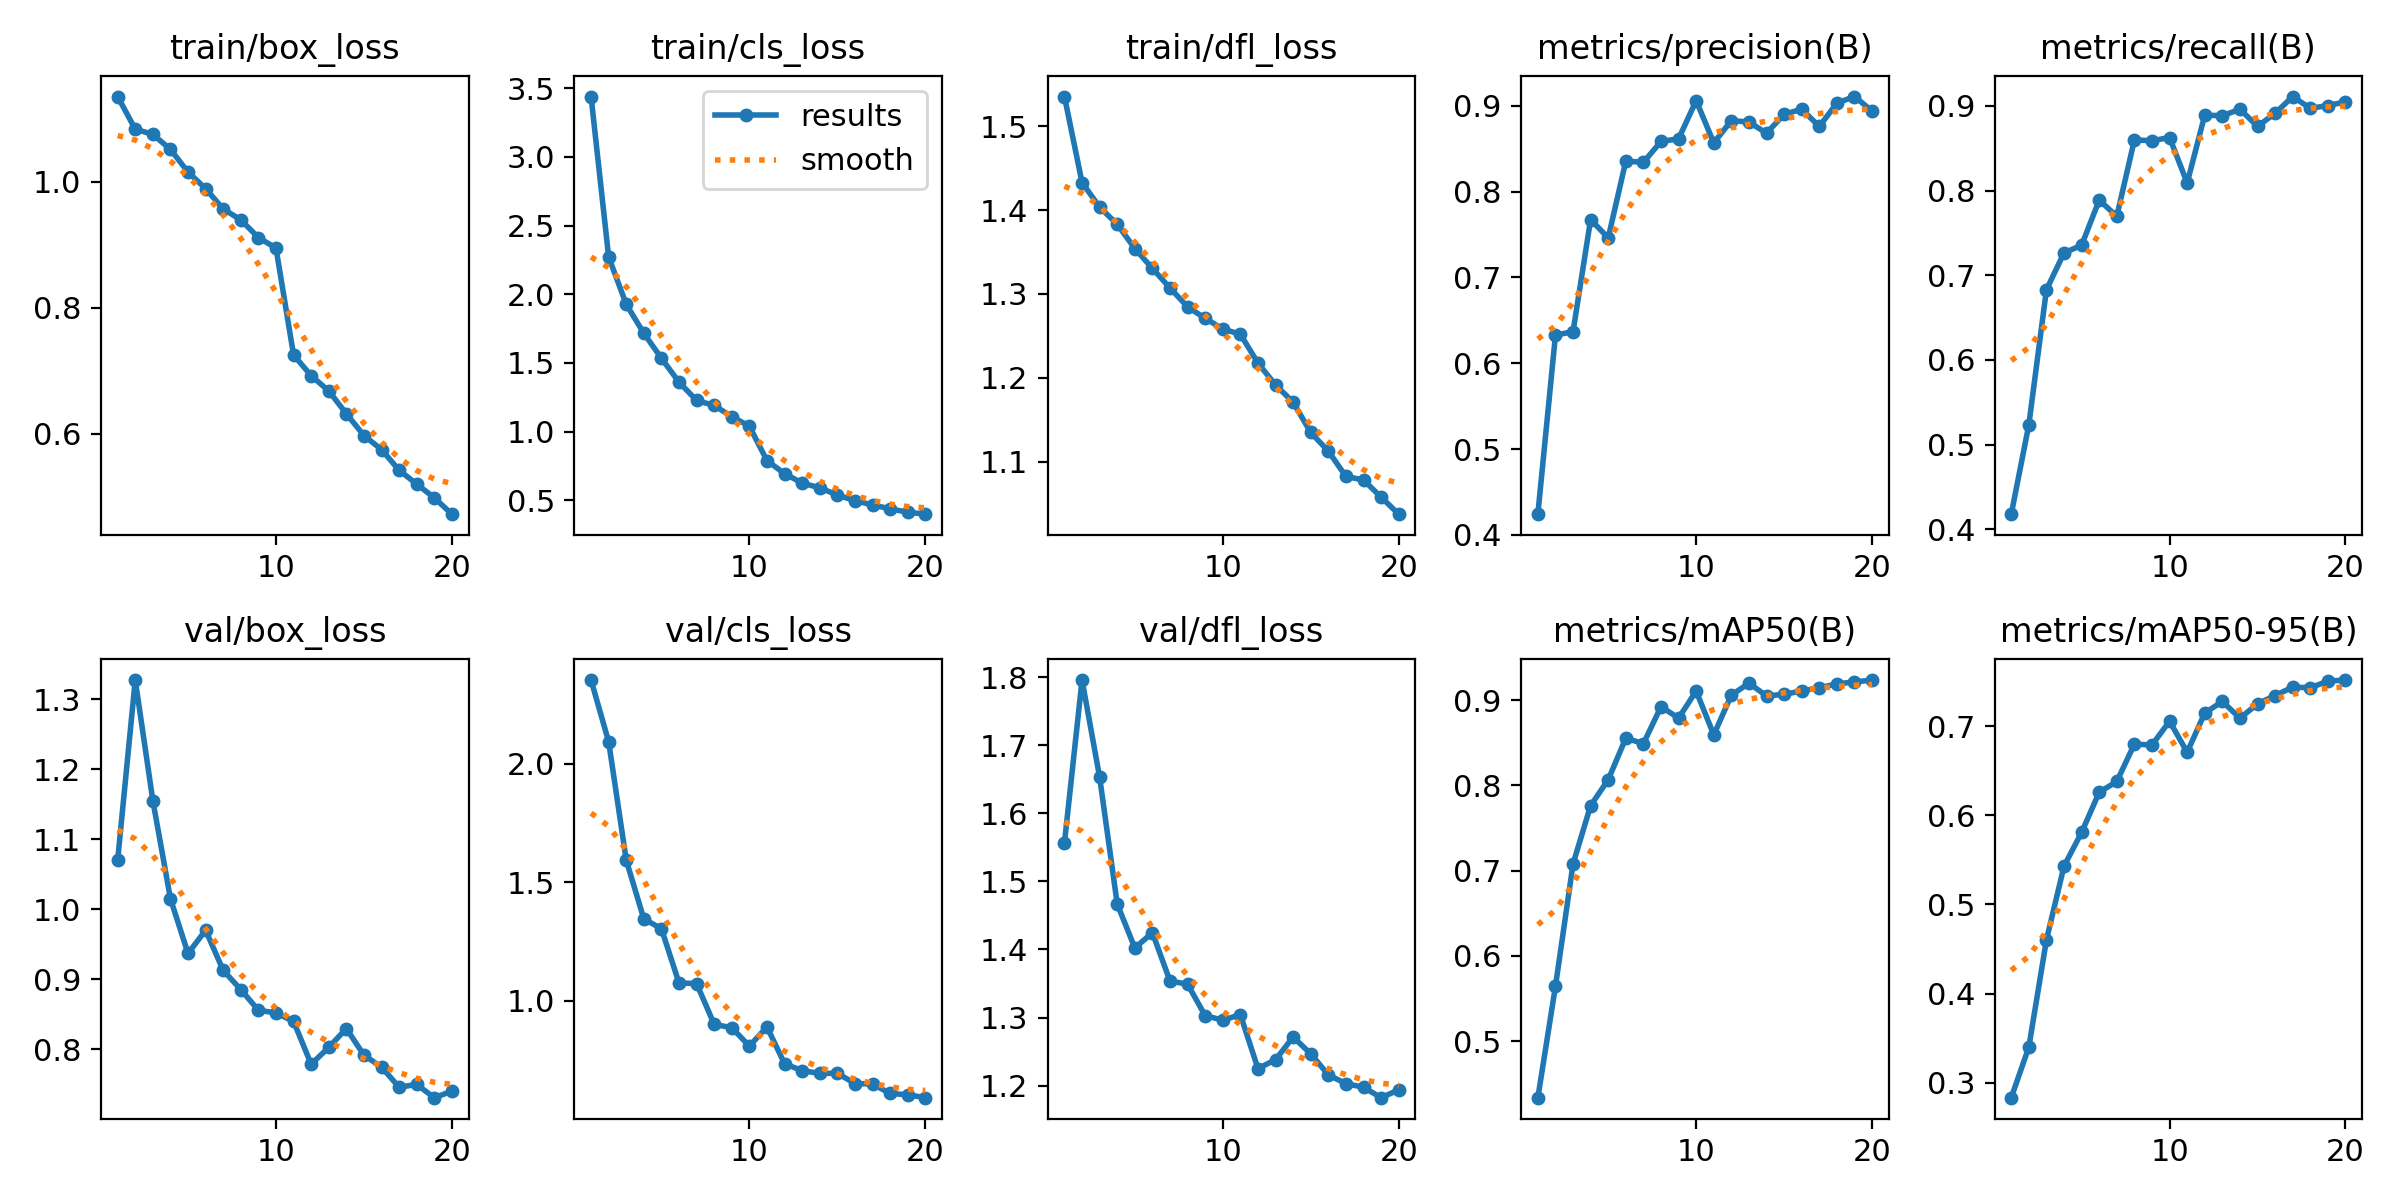

In [9]:
Image(filename='/content/runs/detect/train/results.png', width=1000)

## Model Validation

In [11]:
best_model = YOLO('/content/runs/detect/train/weights/best.pt')
# best_model = YOLO('/content/best.pt')
results = best_model.val(data='/content/dataset/data.yaml')

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 486 images, 23 backgrounds, 0 corrupt: 100%|██████████| 486/486 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.30it/s]


                   all        486        463      0.894      0.905      0.923      0.752
                church         46         46      0.873      0.898      0.934      0.751
                enough         38         38      0.918      0.882       0.96      0.805
                friend         44         44      0.888      0.903      0.887      0.678
                  love         49         49      0.906      0.978      0.953      0.731
                    me         62         62      0.887      0.935      0.929      0.717
                mosque         64         64      0.919      0.891      0.942      0.809
                  seat         51         51      0.918      0.882      0.913      0.782
                temple         59         59      0.906      0.898      0.919      0.776
                   you         50         50      0.829      0.874      0.872      0.718
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect

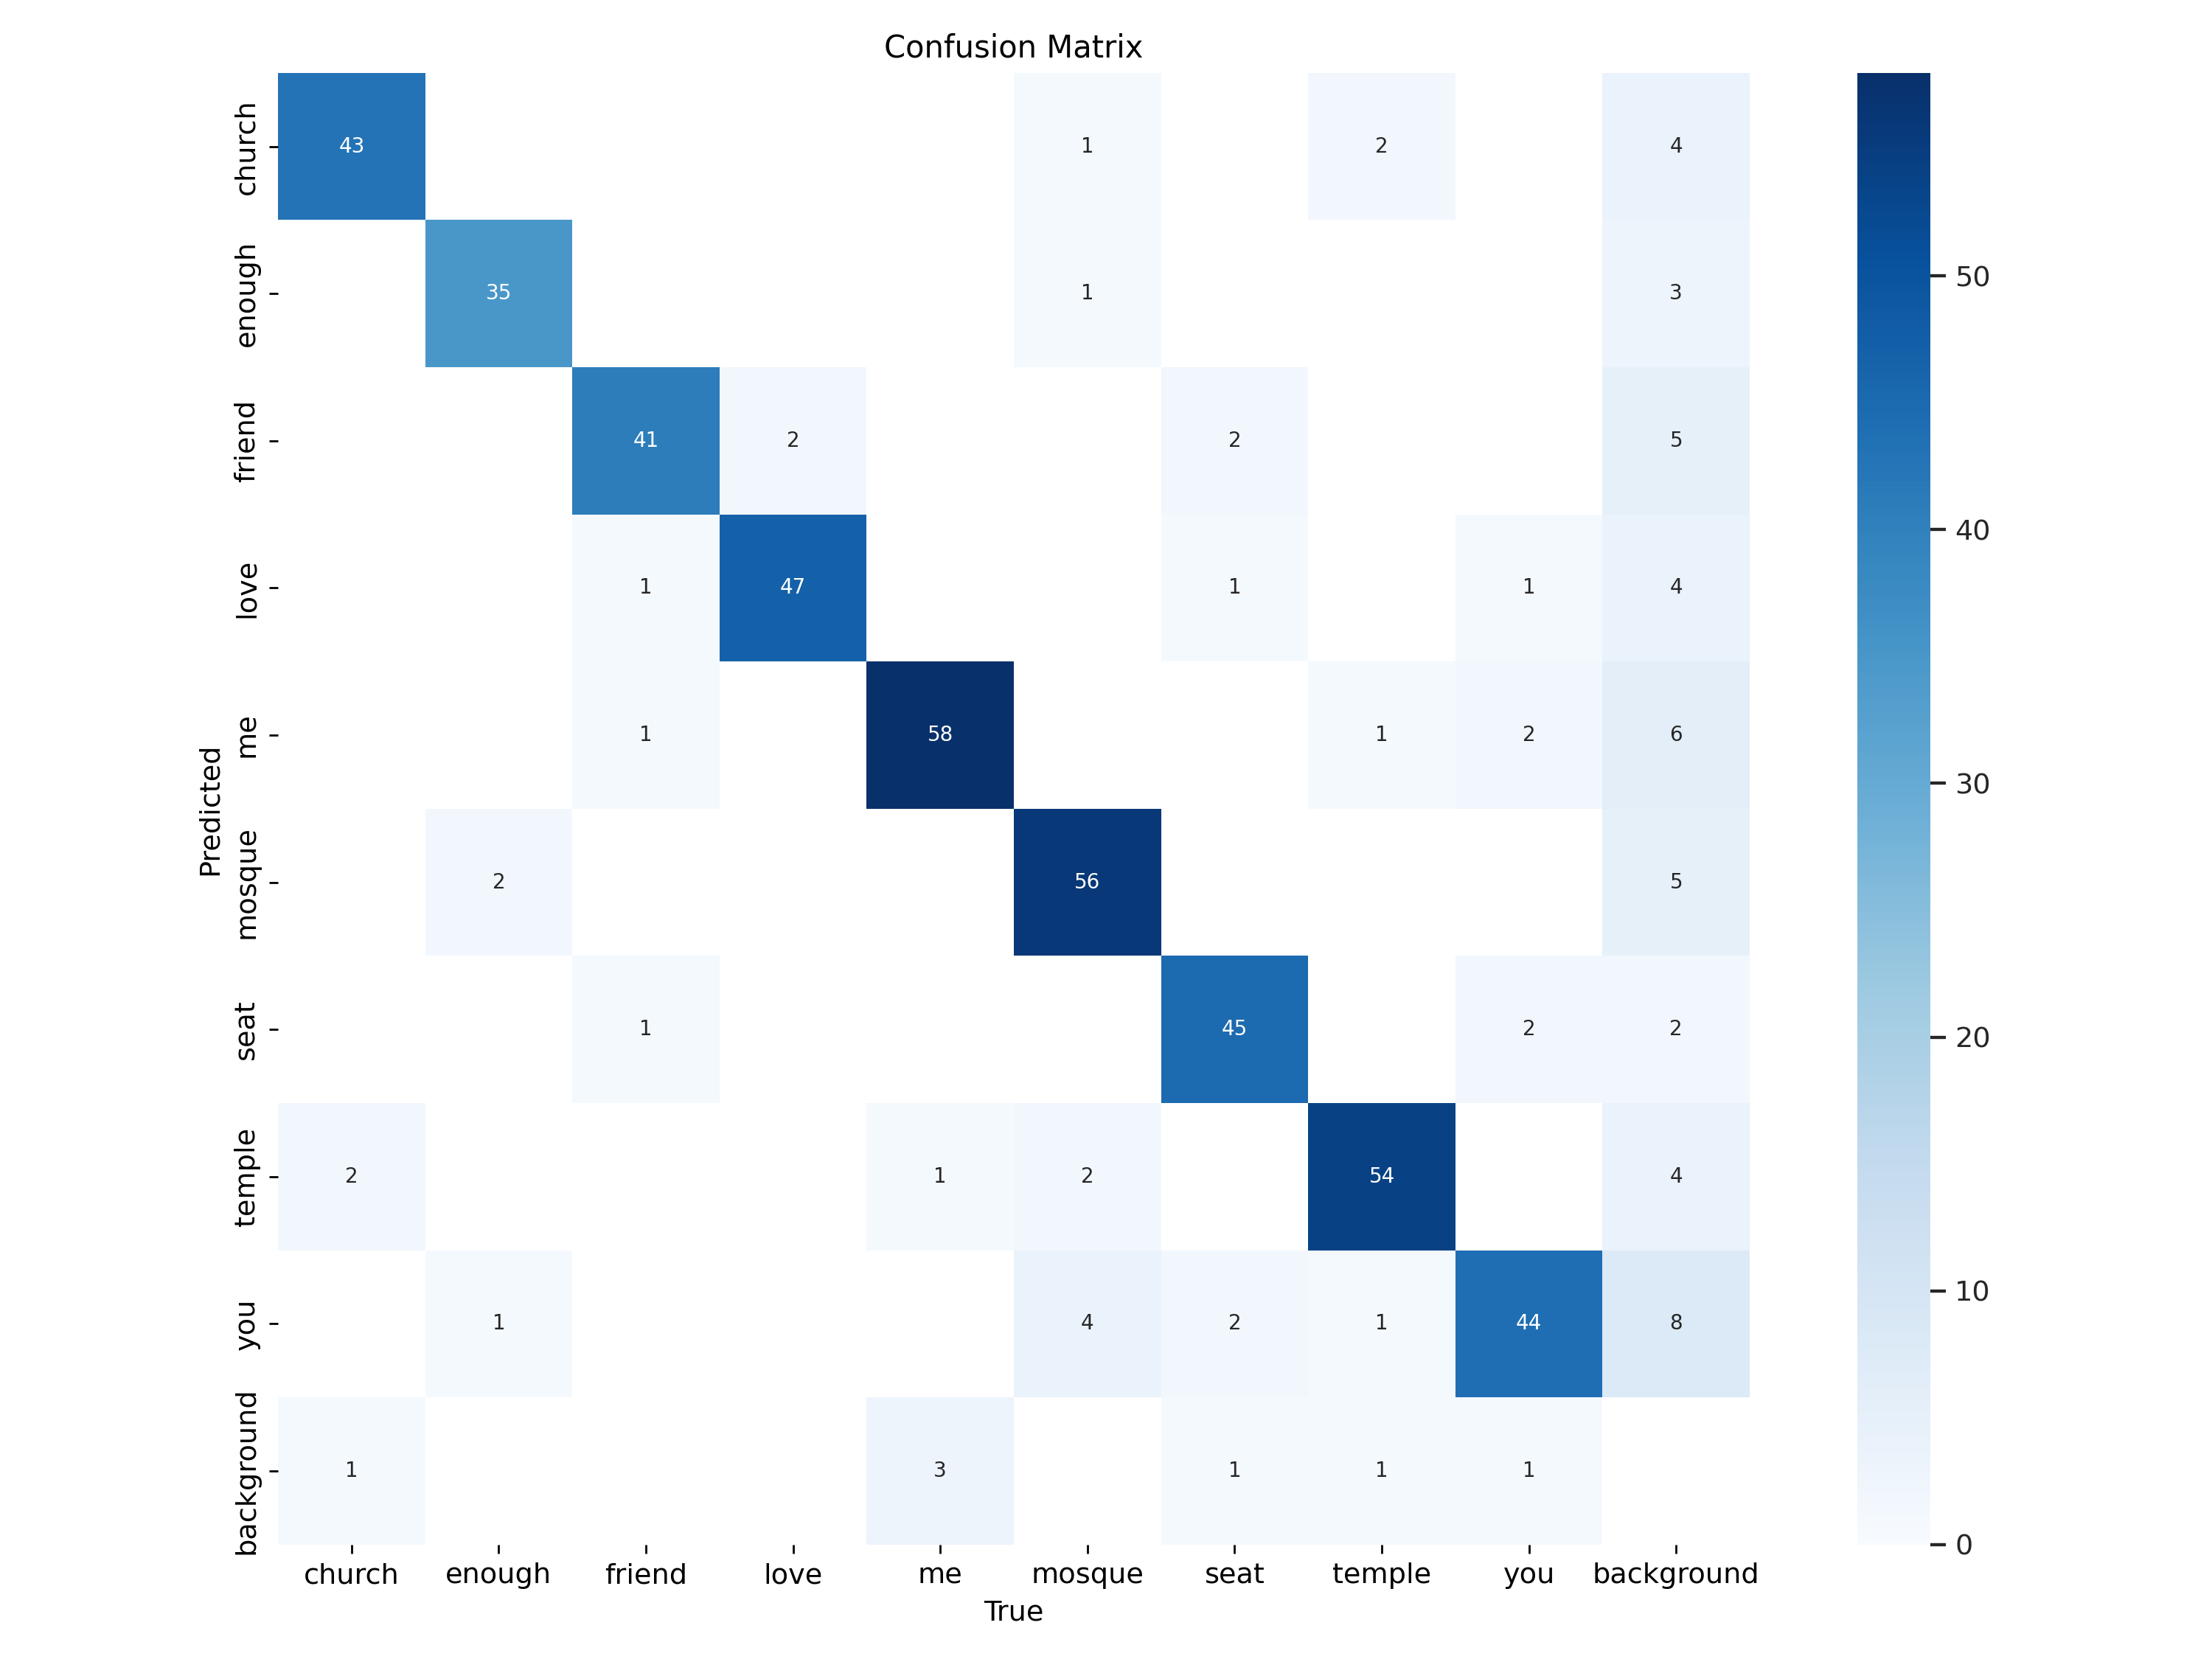

In [12]:
Image(filename='/content/runs/detect/val2/confusion_matrix.png', width=1000)

In [13]:
results = best_model.predict(source='/content/dataset/test/images/ImageID_0IBAU19T_jpg.rf.bb33a5ff665b935a7a715d00467b2064.jpg', save=True)


image 1/1 /content/dataset/test/images/ImageID_0IBAU19T_jpg.rf.bb33a5ff665b935a7a715d00467b2064.jpg: 640x640 1 church, 12.3ms
Speed: 2.7ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


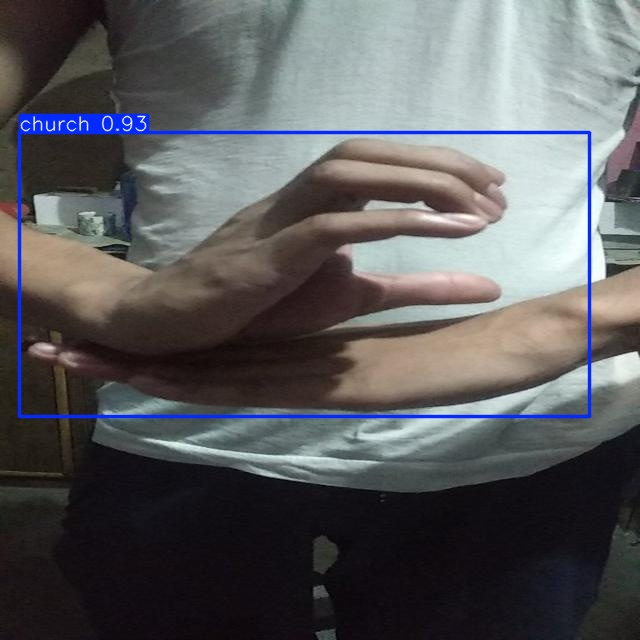

In [14]:
Image(filename='/content/runs/detect/predict/ImageID_0IBAU19T_jpg.rf.bb33a5ff665b935a7a715d00467b2064.jpg', width=500)


image 1/1 /content/dataset/test/images/ImageID_0IBAU19T_jpg.rf.bb33a5ff665b935a7a715d00467b2064.jpg: 640x640 1 church, 17.8ms
Speed: 2.7ms preprocess, 17.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


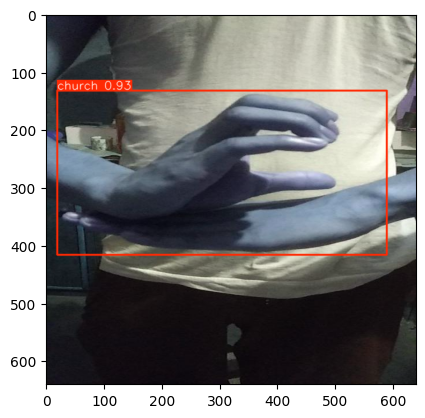

In [15]:
results = best_model('/content/dataset/test/images/ImageID_0IBAU19T_jpg.rf.bb33a5ff665b935a7a715d00467b2064.jpg')
for result in results:
    plt.imshow(result.plot())
    plt.show()

In [16]:
results = best_model.predict(source='/content/video_dataset/train/iloveyou/Iloveyou_front.MOV', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/297) /content/video_dataset/train/iloveyou/Iloveyou_front.MOV: 640x512 1 you, 90.3ms
video 1/1 (frame 2/297) /content/video_dataset/train/iloveyou/Iloveyou_front.MOV: 640x512 1 you, 18.4ms
video 1/1 (frame 3/297) /content/video_dataset/train/iloveyou/Iloveyou_front.MOV: 640x512 1 you, 12.7ms
video 1/1 (frame 4/297) /content/video_dataset/train/iloveyou/Iloveyou_front.MOV: 640x512 1 you, 13.0ms
video 1/1 (frame 5/297) /content/video_d

In [17]:
from IPython.display import Video, HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict/Iloveyou_front.avi'

# Compressed video path
compressed_path = '/content/compressed_video.mp4'

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width="500" controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

## CNN Feature Extraction

In [ ]:
import torch
import cv2
import numpy as np
from ultralytics import YOLO

# Parameters
sequence_length = 30  # Number of frames per sequence
feature_size = 512    # Fixed feature size for each frame

# Load YOLOv8 Model
yolo_model = YOLO('/content/best.pt')

def extract_features_from_video(video_path):
    """
    Extracts spatial features from each frame of the video using YOLOv8.
    Aggregates the features into a fixed-length sequence for LSTM input.
    """
    cap = cv2.VideoCapture(video_path)
    features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame for YOLO input
        frame_resized = cv2.resize(frame, (640, 640))

        # Inference with YOLO
        results = yolo_model(frame_resized)

        # Extract bounding boxes and confidence scores
        detections = results[0].boxes.data.cpu().numpy()  # Get detections as NumPy array

        if len(detections) > 0:
            # Take the mean of detection features or zero-pad if fewer than feature_size columns
            detection_features = np.mean(detections, axis=0)[:feature_size]
            if len(detection_features) < feature_size:
                detection_features = np.pad(detection_features, (0, feature_size - len(detection_features)))
        else:
            # If no detections, append a zero vector
            detection_features = np.zeros(feature_size)

        features.append(detection_features)

    cap.release()

    # Pad or truncate to fixed sequence length
    if len(features) > sequence_length:
        features = features[:sequence_length]
    else:
        features.extend([np.zeros(feature_size)] * (sequence_length - len(features)))

    return np.array(features)

# Example Usage
video_path = "/content/video_dataset/train/iloveyou/Iloveyou_front.MOV"
sequence_features = extract_features_from_video(video_path)
print("Extracted Sequence Features Shape:", sequence_features.shape)


0: 640x640 (no detections), 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 16.6ms
Speed: 2.2ms preprocess, 16.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 you, 9.3ms
Speed: 4.5ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 you, 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.4ms
Speed: 2.3ms preprocess, 14.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 0.6ms postprocess pe

## LSTM Model

In [ ]:
import torch
import torch.nn as nn
import cv2
import numpy as np
from ultralytics import YOLO

# Parameters
sequence_length = 30  # Number of frames per sequence
feature_size = 512    # Fixed feature size for each frame

# Load YOLOv11 Model
yolo_model = YOLO('/content/best.pt')

def save_features_with_label(features, label, output_file):
    """
    Saves the extracted features along with the label to a file.
    """
    # Create a dictionary to store features and labels
    data = {
        "features": features.tolist(),  # Convert NumPy array to list for compatibility
        "label": label
    }
    np.save(output_file, data)
    print(f"Saved features and label to {output_file}")

def extract_features_from_video(video_path):
    """
    Extracts spatial features from each frame of the video using YOLOv8.
    Aggregates the features into a fixed-length sequence for LSTM input.
    """
    cap = cv2.VideoCapture(video_path)
    features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame for YOLO input
        frame_resized = cv2.resize(frame, (640, 640))

        # Inference with YOLO
        results = yolo_model(frame_resized)

        # Extract bounding boxes and confidence scores
        detections = results[0].boxes.data.cpu().numpy()  # Get detections as NumPy array

        if len(detections) > 0:
            # Take the mean of detection features or zero-pad if fewer than feature_size columns
            detection_features = np.mean(detections, axis=0)[:feature_size]
            if len(detection_features) < feature_size:
                detection_features = np.pad(detection_features, (0, feature_size - len(detection_features)))
        else:
            # If no detections, append a zero vector
            detection_features = np.zeros(feature_size)

        features.append(detection_features)

    cap.release()

    # Pad or truncate to fixed sequence length
    if len(features) > sequence_length:
        features = features[:sequence_length]
    else:
        features.extend([np.zeros(feature_size)] * (sequence_length - len(features)))

    # Convert to numpy array and reshape to [1, seq_len, input_size]
    return np.array(features).reshape(1, sequence_length, feature_size)

# Example Usage
video_path = "/content/video_dataset/train/iloveyou/Iloveyou_front.MOV"
sequence_features = extract_features_from_video(video_path)
print("Extracted Sequence Features Shape:", sequence_features.shape)

# Convert features to torch tensor and add batch dimension if needed
if len(sequence_features.shape) == 2:  # Shape is [sequence_length, input_size]
    inputs = torch.tensor(sequence_features).unsqueeze(0).float().to('cuda')  # Add batch dimension
else:
    inputs = torch.tensor(sequence_features).float().to('cuda')  # Assume correct shape

print(f"Inputs shape before LSTM: {inputs.shape}")

# Define LSTM model (if not already defined)
lstm_model = nn.LSTM(input_size=512, hidden_size=256, num_layers=1, batch_first=True)
lstm_model = lstm_model.to('cuda')  # Ensure model is on the correct device

# Forward pass through LSTM
outputs, (hn, cn) = lstm_model(inputs)
print(f"Outputs shape: {outputs.shape}")

# Define the corresponding label
label = "loveyou"

# Save to a file
output_file = "/content/loveyou_front.npy"
save_features_with_label(sequence_features, label, output_file)



0: 640x640 (no detections), 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 26.0ms
Speed: 8.8ms preprocess, 26.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 you, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 you, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.6ms
Speed: 2.7ms preprocess, 14.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 0.8ms post

In [ ]:
import numpy as np
import os

def load_dataset(dataset_dir):
    """
    Loads the saved feature dataset.
    """
    features = []
    labels = []

    for file in os.listdir(dataset_dir):
        if file.endswith(".npy"):
            data = np.load(os.path.join(dataset_dir, file), allow_pickle=True).item()
            features.append(data["features"])
            labels.append(data["label"])

    return np.array(features), np.array(labels)

# Example Usage
dataset_dir = "/content/dataset"
X, y = load_dataset(dataset_dir)
print("Feature Dataset Shape:", X.shape)
print("Labels:", y)

Feature Dataset Shape: (1, 1, 30, 512)
Labels: ['loveyou']


In [ ]:
import torch
import torch.nn as nn

# Reshape the feature dataset
X = torch.tensor(X).squeeze(1).float().to('cuda')  # Shape: [1, 30, 512]
y = torch.tensor([0]).to('cuda')  # Corresponding label

# Define the LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # Fully connected for classification

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        # Use the last hidden state for classification
        out = self.fc(hn[-1])
        return out

# Initialize Model
input_size = 512
hidden_size = 256
num_classes = 9  # Update to the total number of classes in your dataset
lstm_model = LSTMClassifier(input_size, hidden_size, num_classes).to('cuda')

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):
    lstm_model.train()

    # Forward Pass
    outputs = lstm_model(X)  # Shape: [batch_size, num_classes]
    loss = criterion(outputs, y)

    # Backward Pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Save the trained model
torch.save(lstm_model.state_dict(), "lstm_model.pth")
print("LSTM trained and saved!")

Epoch 1/10, Loss: 2.1575
Epoch 2/10, Loss: 1.8443
Epoch 3/10, Loss: 1.5694
Epoch 4/10, Loss: 1.3506
Epoch 5/10, Loss: 1.1398
Epoch 6/10, Loss: 0.9419
Epoch 7/10, Loss: 0.7333
Epoch 8/10, Loss: 0.5360
Epoch 9/10, Loss: 0.3841
Epoch 10/10, Loss: 0.2791
LSTM trained and saved!


In [ ]:
# Step 1: Load the model
lstm_model = LSTMClassifier(input_size=512, hidden_size=256, num_classes=9)
lstm_model.load_state_dict(torch.load("lstm_model.pth"))
lstm_model = lstm_model.to('cuda').eval()

# Step 2: Extract features
test_video_path = "/content/video_dataset/train/iloveyou/Iloveyou_front.MOV"
test_features = extract_features_from_video(test_video_path)
test_inputs = torch.tensor(test_features).float().to('cuda')

# Step 3: Predict
with torch.no_grad():
    outputs = lstm_model(test_inputs)
    predicted_class = torch.argmax(outputs, dim=1).item()

# Step 4: Map index to label
class_labels = ["love_you"]
predicted_label = class_labels[predicted_class]

print(f"Predicted Gesture: {predicted_label}")


0: 640x640 (no detections), 18.2ms
Speed: 2.8ms preprocess, 18.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 19.5ms
Speed: 1.9ms preprocess, 19.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 you, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 you, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.1ms
Speed: 2.5ms preprocess, 14.1ms inference, 0.9ms post